Importing Modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

Generating XOR dataset

In [2]:
# Generate XOR dataset
np.random.seed(0)
X_train = np.random.rand(200, 2) * 2 - 1  # Random values between -1 and 1
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int)  # XOR labels
X_test = np.random.rand(200, 2) * 2 - 1
y_test = np.logical_xor(X_test[:, 0] > 0, X_test[:, 1] > 0).astype(int)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train[:5], y_train[:5])

(200, 2) (200,)
(200, 2) (200,)
[[ 0.09762701  0.43037873]
 [ 0.20552675  0.08976637]
 [-0.1526904   0.29178823]
 [-0.12482558  0.783546  ]
 [ 0.92732552 -0.23311696]] [0 0 1 1 1]


In [3]:
# Split the training data into training and validation sets
X_train_new, X_val = X_train[:150], X_train[150:]
y_train_new, y_val = y_train[:150], y_train[150:]
print(X_train_new.shape, y_train_new.shape)

(150, 2) (150,)


A. MLP

In [7]:
def create_mlp(learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(2, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)  # Specify the learning rate in the optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train MLP models
mlp = create_mlp(learning_rate=0.03)
mlp.fit(X_train_new, y_train_new, epochs=500, verbose=0)

# Evaluate MLP model
mlp_loss, mlp_accuracy = mlp.evaluate(X_test, y_test, verbose=0)
print("MLP Test Loss:", mlp_loss)
print("MLP Test Accuracy:", mlp_accuracy)

MLP Test Loss: 0.07104825228452682
MLP Test Accuracy: 0.9800000190734863


D. Logistic Regression

In [8]:
# Train logistic regression with polynomial features
poly = PolynomialFeatures(degree=2)  # This adds features which are x1^2, x2^2, x1*x2

X_train_poly = poly.fit_transform(X_train_new)
X_test_poly = poly.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_poly, y_train_new)

# Evaluate Logistic Regression model with additional features
log_reg_accuracy = accuracy_score(y_test, logreg.predict(X_test_poly))
print("Logistic Regression Test Accuracy with Additional Features:", log_reg_accuracy)

Logistic Regression Test Accuracy with Additional Features: 0.945


B. L1 Regularization

In [10]:
def create_mlp_with_regularization(regularizer, learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizer),
        # tf.keras.layers.Dense(2, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


mlp_l1 = create_mlp_with_regularization(tf.keras.regularizers.l1(0.01), learning_rate=0.03)
mlp_l1.fit(X_train, y_train, epochs=500, verbose=0)

# Evaluate MLP model with L1 regularization
mlp_l1_loss, mlp_l1_accuracy = mlp_l1.evaluate(X_test, y_test, verbose=0)
print("MLP with L1 Regularization Test Loss:", mlp_l1_loss)
print("MLP with L1 Regularization Test Accuracy:", mlp_l1_accuracy)



MLP with L1 Regularization Test Loss: 0.15932874381542206
MLP with L1 Regularization Test Accuracy: 0.9900000095367432


C. L2 Regularization

In [12]:
def create_mlp_with_regularization(regularizer, learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizer),
        # tf.keras.layers.Dense(2, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

mlp_l2 = create_mlp_with_regularization(tf.keras.regularizers.l2(0.01), learning_rate=0.03)
mlp_l2.fit(X_train, y_train, epochs=500, verbose=0)

# Evaluate MLP model with L2 regularization
mlp_l2_loss, mlp_l2_accuracy = mlp_l2.evaluate(X_test, y_test, verbose=0)
print("MLP with L2 Regularization Test Loss:", mlp_l2_loss)
print("MLP with L2 Regularization Test Accuracy:", mlp_l2_accuracy)

MLP with L2 Regularization Test Loss: 0.18829941749572754
MLP with L2 Regularization Test Accuracy: 0.9399999976158142


Varying Penalty coefficients

In [16]:
def create_mlp_with_regularization(regularizer, learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=regularizer),
        # tf.keras.layers.Dense(3, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def create_mlp_with_regularization_and_tune(X_train, y_train, X_val, y_val, regularizer, learning_rate):
    best_accuracy = 0
    best_alpha = 0
    
    # Try different values of alpha
    for alpha in [0.001, 0.01, 0.1]:
        model = create_mlp_with_regularization(regularizer(alpha), learning_rate=learning_rate)
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)
        
        # Evaluate model on validation set
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        
        # Update best accuracy and alpha
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_alpha = alpha
            
    # Retrain the model using the best alpha on the entire training set
    print("Best alpha:", best_alpha)
    best_model = create_mlp_with_regularization(regularizer(best_alpha), learning_rate=learning_rate)
    best_model.fit(X_train, y_train, epochs=500, verbose=0)
    
    return best_model


B. L1 regularization

In [17]:
# Train MLP models with L1 regularization and select the best penalty coefficient
mlp_l1 = create_mlp_with_regularization_and_tune(X_train_new, y_train_new, X_val, y_val, tf.keras.regularizers.l1, learning_rate=0.03)

# Evaluate MLP model with L1 regularization
mlp_l1_loss, mlp_l1_accuracy = mlp_l1.evaluate(X_test, y_test, verbose=0)
print("MLP with L1 Regularization Test Loss:", mlp_l1_loss)
print("MLP with L1 Regularization Test Accuracy:", mlp_l1_accuracy)

Best alpha: 0.01
MLP with L1 Regularization Test Loss: 0.2234569489955902
MLP with L1 Regularization Test Accuracy: 0.9449999928474426


C. L2 regularization

In [19]:
# Train MLP models with L2 regularization and select the best penalty coefficient
mlp_l2 = create_mlp_with_regularization_and_tune(X_train_new, y_train_new, X_val, y_val, tf.keras.regularizers.l2, learning_rate=0.03)

# Evaluate MLP model with L2 regularization
mlp_l2_loss, mlp_l2_accuracy = mlp_l2.evaluate(X_test, y_test, verbose=0)
print("MLP with L2 Regularization Test Loss:", mlp_l2_loss)
print("MLP with L2 Regularization Test Accuracy:", mlp_l2_accuracy)

Best alpha: 0.01
MLP with L2 Regularization Test Loss: 0.1166592389345169
MLP with L2 Regularization Test Accuracy: 0.9950000047683716


Visualizing

1506/1506 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step
1506/1506 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step


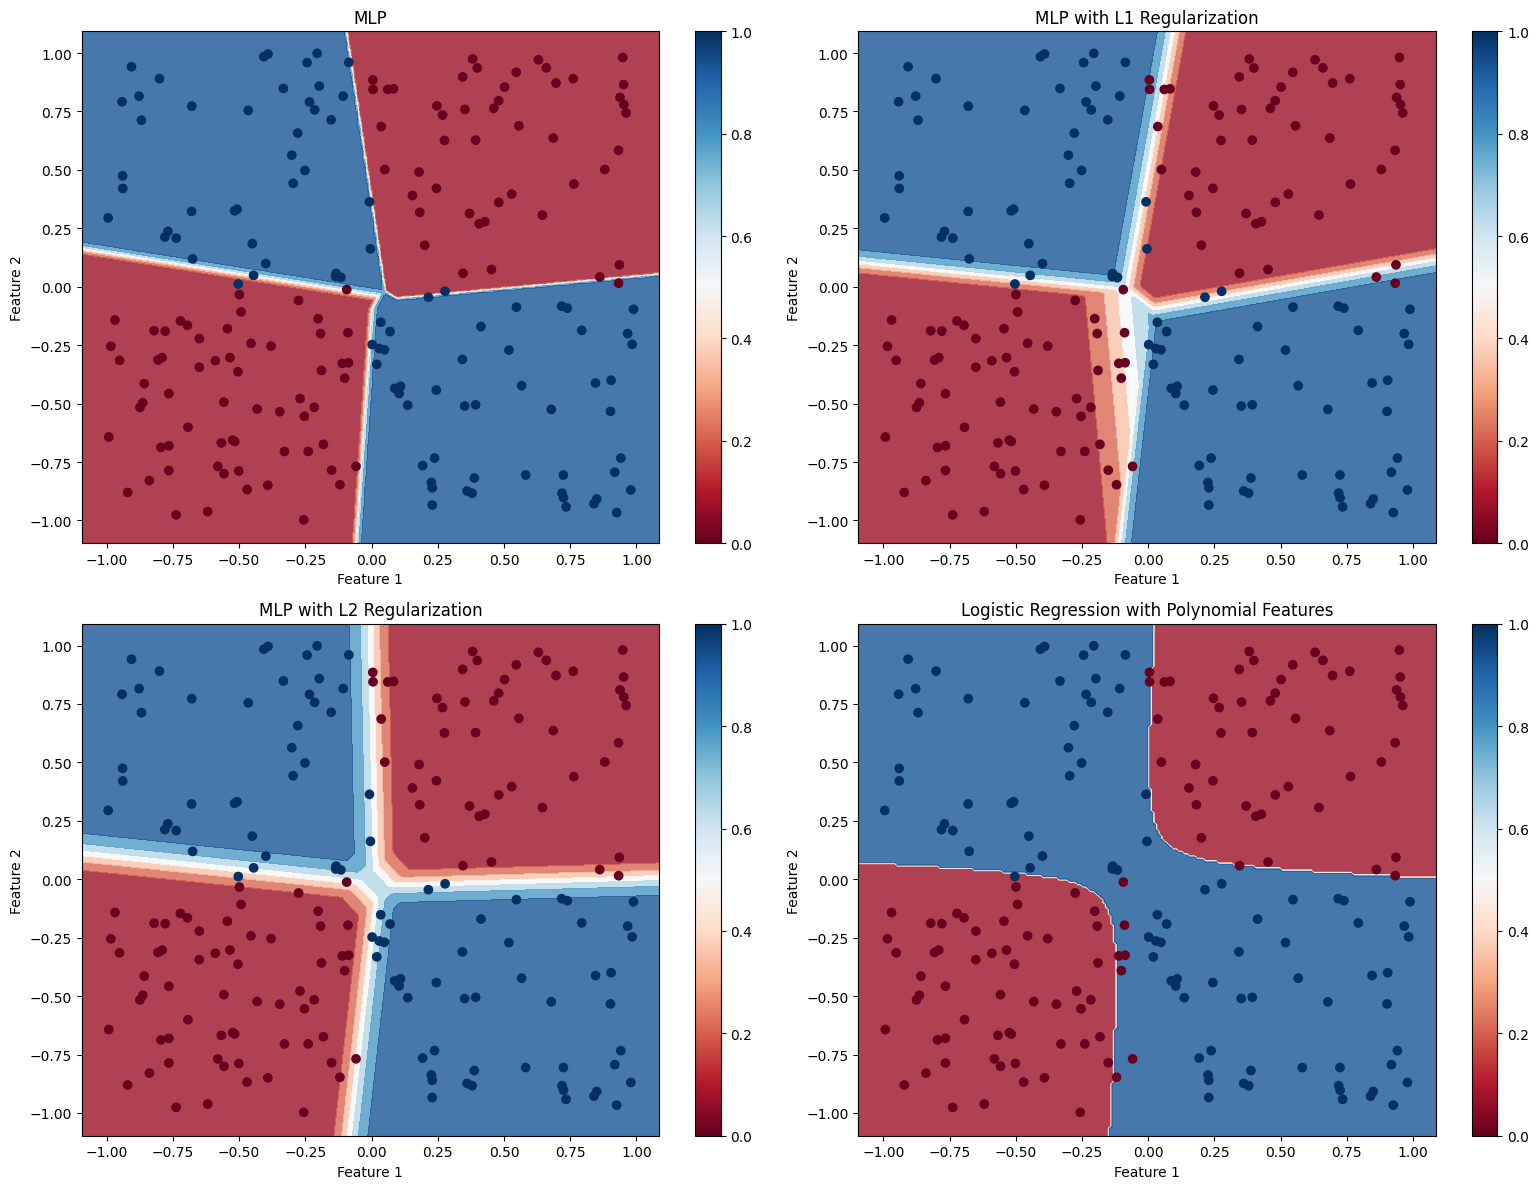

In [20]:
# Visualize decision surfaces
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    if isinstance(model, LogisticRegression):
        Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.colorbar()

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plot_decision_boundary(mlp, X_test, y_test)
plt.title('MLP')

plt.subplot(2, 2, 2)
plot_decision_boundary(mlp_l1, X_test, y_test)
plt.title('MLP with L1 Regularization')

plt.subplot(2, 2, 3)
plot_decision_boundary(mlp_l2, X_test, y_test)
plt.title('MLP with L2 Regularization')

plt.subplot(2, 2, 4)
plot_decision_boundary(logreg, X_test, y_test)
plt.title('Logistic Regression with Polynomial Features')

plt.tight_layout()
plt.show()